<h2> Simulações: Capítulo 5

In [1]:
#Instale a biblioteca 'control' antes de rodar as simulações

!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 2.3 MB/s eta 0:00:00


**Simulação 1: Controle do Telescópio Espacial Hubble**

**Objetivo:** Mostrar a resposta ao degrau e a resposta à perturbação para o sistema de controle do telescópio espacial Hubble.

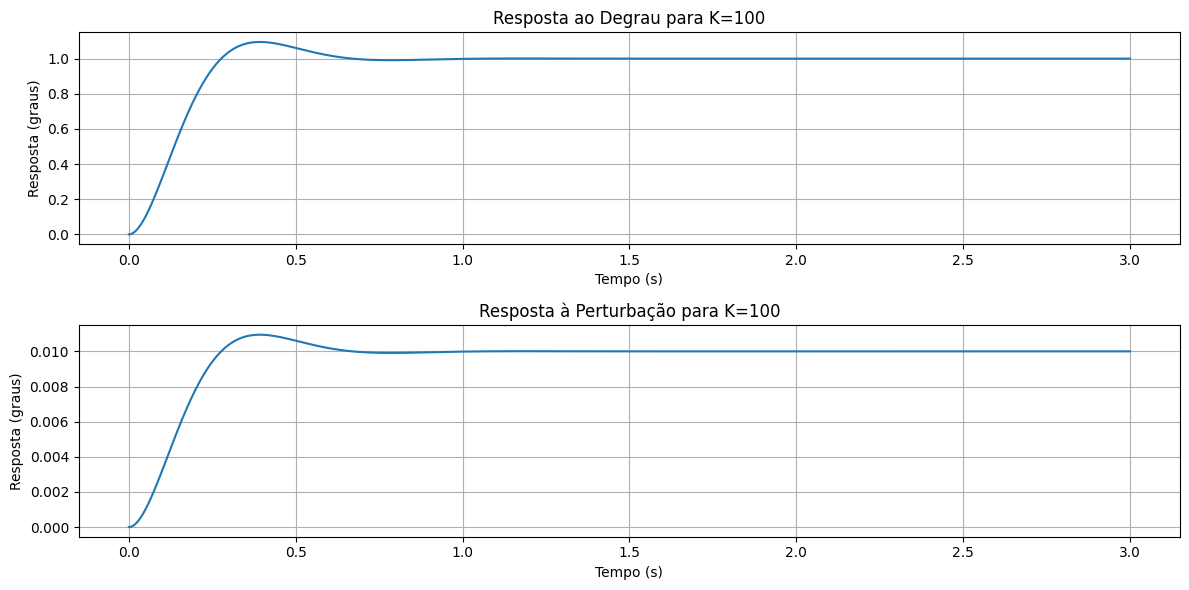

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl


K = 100
K1 = 12
num1 = [K]
den1 = [1, K1, K]
system1 = ctrl.TransferFunction(num1, den1)

time = np.linspace(0, 3, 1000)
time, step_response = ctrl.step_response(system1, T=time)

num_disturbance = [1]
den_disturbance = [1, K1, K]
system_disturbance = ctrl.TransferFunction(num_disturbance, den_disturbance)
time, disturbance_response = ctrl.step_response(system_disturbance, T=time)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, step_response)
plt.title('Resposta ao Degrau para K=100')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (graus)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, disturbance_response)
plt.title('Resposta à Perturbação para K=100')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (graus)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Simulação 2: Controle de Atitude de um Avião**

**Objetivo:** Mostrar a comparação entre a resposta ao degrau do sistema de terceira ordem e a aproximação de segunda ordem para o controle de atitude de um avião.

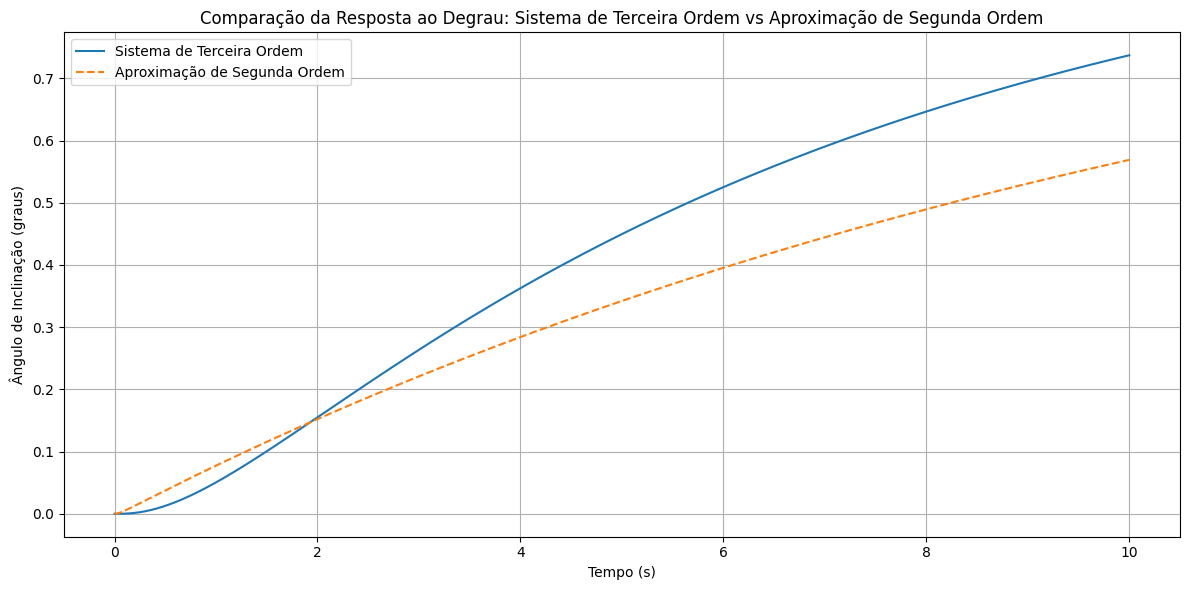

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl

# Definir a função de transferência para o sistema de terceira ordem
K = 0.16
num2 = [11.4 * K]
den2 = [1, 11.4, 14, 11.4 * K]
system2 = ctrl.TransferFunction(num2, den2)

# Aproximação de segunda ordem
num_approx = [11.29 * K]
den_approx = [1, (21.92 - 2.91 * K), 11.29 * K]
system_approx = ctrl.TransferFunction(num_approx, den_approx)

time = np.linspace(0, 10, 1000)
time_third_order, response_third_order = ctrl.step_response(system2, T=time)
time_second_order, response_second_order = ctrl.step_response(system_approx, T=time)

plt.figure(figsize=(12, 6))

plt.plot(time_third_order, response_third_order, label='Sistema de Terceira Ordem')
plt.plot(time_second_order, response_second_order, label='Aproximação de Segunda Ordem', linestyle='--')
plt.title('Comparação da Resposta ao Degrau: Sistema de Terceira Ordem vs Aproximação de Segunda Ordem')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Inclinação (graus)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()